# DAILY PRODUCT QUANTITY SALES PREDICTOR

# PREPARATION

## IMPORT LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

## LOAD DATA

In [ ]:
# Customer
df1 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Customer.csv')

# Store
df2 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Store.csv')

# Product
df3 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Product.csv')

# Transaction
df4 = pd.read_csv('drive/MyDrive/DATA SCIENCE PORTFOLIO/PBI - KALBE NUTRITIONALS - DATA SCIENTIST/Minggu 4 - Final Project/Transaction.csv')

## MERGE DATA

In [ ]:
# Transcation with Customer
df = df4.merge(df1, left_on='CustomerID', right_on='CustomerID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53"
1,TR67395,328,1/22/2022,P8,16000,3,48000,11,36,0,Married,"10,53"
2,TR89012,328,3/25/2022,P5,4200,5,21000,6,36,0,Married,"10,53"
3,TR97172,328,5/21/2022,P1,8800,5,44000,1,36,0,Married,"10,53"
4,TR57013,328,9/15/2022,P7,9400,6,56400,1,36,0,Married,"10,53"


In [ ]:
# Transcation with Customer
df = df.merge(df3, left_on='ProductID', right_on='ProductID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500
1,TR20170,165,7/23/2022,P3,7500,2,15000,13,44,1,Married,"14,58",Crackers,7500
2,TR80016,183,1/24/2022,P3,7500,2,15000,10,27,1,Single,"0,18",Crackers,7500
3,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500
4,TR82094,183,9/15/2022,P3,7500,2,15000,1,27,1,Single,"0,18",Crackers,7500


In [ ]:
# Transcation with Store
df = df.merge(df2, left_on='StoreID', right_on='StoreID')
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR9106,123,9/26/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR4331,335,1/8/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR6445,181,1/10/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


## CHECK MISSING VALUES

In [ ]:
df.isnull().sum()

TransactionID      0
CustomerID         0
Date               0
ProductID          0
Price_x            0
Qty                0
TotalAmount        0
StoreID            0
Age                0
Gender             0
Marital Status    44
Income             0
Product Name       0
Price_y            0
StoreName          0
GroupStore         0
Type               0
Latitude           0
Longitude          0
dtype: int64

In [ ]:
# Fill missing values with modes
df['Marital Status'].fillna(df['Marital Status'].mode()[0], inplace=True)

## CHECK DUPLICATED VALUES

In [ ]:
df.duplicated().sum()

0

## DROP REDUNDANT COLUMNS

In [ ]:
df.head()

,TransactionID,CustomerID,Date,ProductID,Price_x,Qty,TotalAmount,StoreID,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,TR11369,328,1/1/2022,P3,7500,4,30000,12,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,TR89318,183,7/17/2022,P3,7500,1,7500,12,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,TR9106,123,9/26/2022,P3,7500,4,30000,12,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,TR4331,335,1/8/2022,P3,7500,3,22500,12,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,TR6445,181,1/10/2022,P3,7500,4,30000,12,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


In [ ]:
# Drop ID's columns because it does not have any meaning
df = df.drop(['TransactionID', 'CustomerID', 'ProductID', 'StoreID'], axis=1)

## ENCODING

In [ ]:
df.head()

,Date,Price_x,Qty,TotalAmount,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1/1/2022,7500,4,30000,36,0,Married,"10,53",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
1,7/17/2022,7500,1,7500,27,1,Single,"0,18",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
2,9/26/2022,7500,4,30000,34,0,Married,"4,36",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
3,1/8/2022,7500,3,22500,29,1,Single,"4,74",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"
4,1/10/2022,7500,4,30000,33,1,Married,"9,94",Crackers,7500,Prestasi Utama,Prestasi,General Trade,"-2,990,934","104,756,554"


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
categorical_columns=['Marital Status','Product Name','StoreName','GroupStore','Type', 'Longitude','Latitude']
for col in categorical_columns:
    # make the encoder
    encoder = LabelEncoder()
    # fit the encoder with col we want to label for information good
    encoder.fit(df[col])
    # print information
    print('Column:', col)
    print('Original categories:', encoder.classes_)
    print('Encoded values:', encoder.transform(encoder.classes_))
    print('\n')
    # fit transform to apply the label
    df[col] = encoder.fit_transform(df[col])

Column: Marital Status
Original categories: ['Married' 'Single']
Encoded values: [0 1]


Column: Product Name
Original categories: ['Cashew' 'Cheese Stick' 'Choco Bar' 'Coffee Candy' 'Crackers'
 'Ginger Candy ' 'Oat' 'Potato Chip' 'Thai Tea' 'Yoghurt']
Encoded values: [0 1 2 3 4 5 6 7 8 9]


Column: StoreName
Original categories: ['Bonafid' 'Buana' 'Buana Indah' 'Gita Ginara' 'Harapan Baru' 'Lingga'
 'Prestasi Utama' 'Priangan' 'Prima Kelapa Dua' 'Prima Kota'
 'Prima Tendean' 'Sinar Harapan']
Encoded values: [ 0  1  2  3  4  5  6  7  8  9 10 11]


Column: GroupStore
Original categories: ['Buana' 'Gita' 'Harapan Baru' 'Lingga' 'Prestasi' 'Priangan' 'Prima']
Encoded values: [0 1 2 3 4 5 6]


Column: Type
Original categories: ['General Trade' 'Modern Trade']
Encoded values: [0 1]


Column: Longitude
Original categories: ['10,526,667' '101,447,403' '104,756,554' '106,816,666' '107,608,238'
 '11,942,379' '110,370,529' '110,416,664' '112,768,845' '114,590,111'
 '116,825,264' '128,190,643' '9

## DATA TRANSFORMATION

In [ ]:
df.head()

,Date,Price_x,Qty,TotalAmount,Age,Gender,Marital Status,Income,Product Name,Price_y,StoreName,GroupStore,Type,Latitude,Longitude
0,1/1/2022,7500,4,30000,36,0,0,"10,53",4,7500,6,4,0,1,2
1,7/17/2022,7500,1,7500,27,1,1,"0,18",4,7500,6,4,0,1,2
2,9/26/2022,7500,4,30000,34,0,0,"4,36",4,7500,6,4,0,1,2
3,1/8/2022,7500,3,22500,29,1,1,"4,74",4,7500,6,4,0,1,2
4,1/10/2022,7500,4,30000,33,1,0,"9,94",4,7500,6,4,0,1,2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5020 entries, 0 to 5019
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            5020 non-null   object
 1   Price_x         5020 non-null   int64 
 2   Qty             5020 non-null   int64 
 3   TotalAmount     5020 non-null   int64 
 4   Age             5020 non-null   int64 
 5   Gender          5020 non-null   int64 
 6   Marital Status  5020 non-null   int64 
 7   Income          5020 non-null   object
 8   Product Name    5020 non-null   int64 
 9   Price_y         5020 non-null   int64 
 10  StoreName       5020 non-null   int64 
 11  GroupStore      5020 non-null   int64 
 12  Type            5020 non-null   int64 
 13  Latitude        5020 non-null   int64 
 14  Longitude       5020 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 627.5+ KB


In [ ]:
# Change Date to datetime
df = df.astype({
    'Date':'datetime64[ns]'
})

In [ ]:
# Change Income
df['Income'] = df['Income'].str.replace(',', '.')
df = df.astype({
    'Income':'float64'
})

## OUTLIERS

In [ ]:
from scipy import stats

In [ ]:
# Using z-score to find outliers and removes it
print(f'Jumlah baris sebelum memfilter outlier: {len(df)}')

filtered_entries = np.array([True] * len(df))
for col in ['Price_x', 'Qty', 'TotalAmount', 'Age', 'Gender', 'Income', 'Price_y']:
    zscore = abs(stats.zscore(df[col]))
    filtered_entries = (zscore < 3) & filtered_entries

df = df[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(df)}')

Jumlah baris sebelum memfilter outlier: 5020
Jumlah baris setelah memfilter outlier: 4907


## GROUPED BY DATA

In [ ]:
df_before_grouped = df

In [ ]:
df = df_before_grouped.groupby(['Date']).agg({'Qty': 'sum'}).reset_index()

In [ ]:
df

,Date,Qty
0,2022-01-01,49
1,2022-01-02,49
2,2022-01-03,63
3,2022-01-04,45
4,2022-01-05,30
...,...,...
360,2022-12-27,70
361,2022-12-28,51
362,2022-12-29,42
363,2022-12-30,44


# ARIMA TIME-SERIES REGRESSION MODEL

## PLOT TIME-SERIES DATA

Text(0, 0.5, 'Qty')

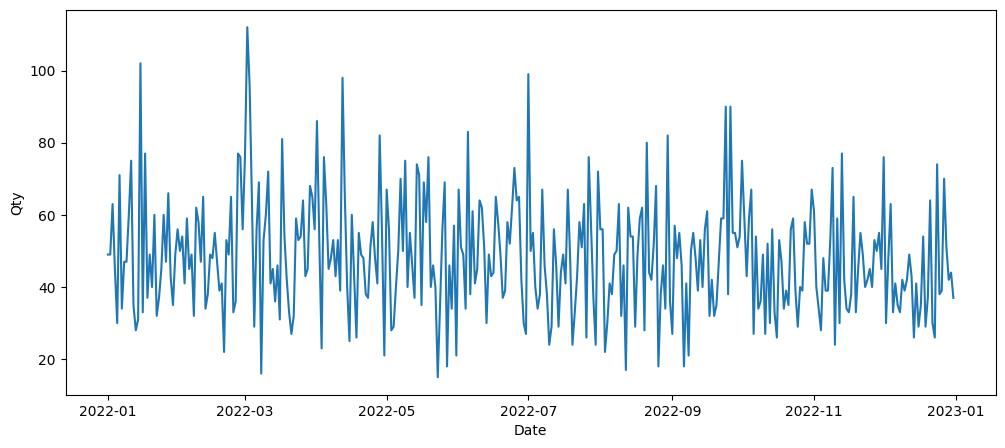

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(df["Date"], df["Qty"])
plt.xlabel('Date')
plt.ylabel('Qty')

## IDENTIFY IF THE DATA IS STATIONARY

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def ad_test(dataset):
  dftest = adfuller(dataset, autolag='AIC')
  print("1. ADF : ", dftest[0])
  print("2. P-value: ", dftest[1])
  print("3. Num of lags : ", dftest[2])
  print("4. Num of Observations used for ADF Regression and Critical Value Calculation : ", dftest[3])
  print("5. Critical Values : ")
  for key, val in dftest[4].items():
    print("\t", key, ": ", val)

In [ ]:
ad_test(df['Qty'])

1. ADF :  -18.995427360195215
2. P-value:  0.0
3. Num of lags :  0
4. Num of Observations used for ADF Regression and Critical Value Calculation :  364
5. Critical Values : 
	 1% :  -3.4484434475193777
	 5% :  -2.869513170510808
	 10% :  -2.571017574266393


## SPLIT DATA INTO TRAIN AND TEST

In [ ]:
print(df.shape)
train = df.iloc[:-30]
test = df.iloc[-30:]
print(train.shape, test.shape)

(365, 2)
(335, 2) (30, 2)


## TRAIN THE MODEL

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
model = ARIMA(train['Qty'], order=(40,1,1))
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  335
Model:                ARIMA(40, 1, 1)   Log Likelihood               -1398.204
Date:                Fri, 01 Sep 2023   AIC                           2880.408
Time:                        11:11:59   BIC                           3040.476
Sample:                             0   HQIC                          2944.229
                                - 335                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0519      0.064     -0.812      0.417      -0.177       0.073
ar.L2          0.0033      0.068      0.048      0.962      -0.131       0.137
ar.L3         -0.0765      0.068     -1.127      0.260      -0.209       0.056
ar.L4          0.0700      0.063      1.114      0.265      -0.053       0.193
ar.L5         -0.0378      0.068     -0.556      0.578      -0.171       0.096
ar.L6          0.0342      0.068      0.500      0.617      -0.100       0.168
ar.L7         -0.0149      0.068     -0.219      0.827      -0.149       0.119
ar.L8          0.0836      0.071      1.178      0.239      -0.055       0.223
ar.L9          0.0282      0.066      0.430      0.668      -0.100       0.157
ar.L10        -0.1440      0.064     -2.235      0.025      -0.270      -0.018
ar.L11        -0.0381      0.077     -0.493      0.622      -0.189       0.113
ar.L12         0.0381      0.074      0.515      0.607      -0.107       0.183
ar.L13        -0.0149      0.070     -0.215      0.830      -0.151       0.121
ar.L14        -0.0773      0.074     -1.045      0.296      -0.222       0.068
ar.L15        -0.0270      0.068     -0.399      0.690      -0.160       0.106
ar.L16        -0.0355      0.075     -0.474      0.635      -0.182       0.111
ar.L17        -0.0329      0.075     -0.441      0.659      -0.179       0.113
ar.L18        -0.1266      0.074     -1.709      0.087      -0.272       0.019
ar.L19        -0.0391      0.070     -0.557      0.578      -0.177       0.099
ar.L20        -0.0466      0.068     -0.688      0.492      -0.180       0.086
ar.L21         0.0030      0.080      0.037      0.970      -0.154       0.160
ar.L22         0.0252      0.072      0.351      0.725      -0.116       0.166
ar.L23        -0.0714      0.071     -1.005      0.315      -0.211       0.068
ar.L24        -0.0162      0.074     -0.220      0.826      -0.161       0.129
ar.L25        -0.0746      0.072     -1.036      0.300      -0.216       0.066
ar.L26         0.0133      0.079      0.168      0.867      -0.142       0.169
ar.L27         0.1289      0.070      1.854      0.064      -0.007       0.265
ar.L28        -0.0151      0.075     -0.203      0.839      -0.161       0.131
ar.L29        -0.0394      0.069     -0.574      0.566      -0.174       0.095
ar.L30         0.0838      0.065      1.294      0.196      -0.043       0.211
ar.L31         0.0129      0.073      0.176      0.860      -0.130       0.156
ar.L32         0.0224      0.066      0.339      0.735      -0.107       0.152
ar.L33        -0.0464      0.065     -0.710      0.478      -0.174       0.082
ar.L34        -0.0235      0.067     -0.352      0.725      -0.154       0.107
ar.L35        -0.1048      0.069     -1.508      0.132      -0.241       0.031
ar.L36        -0.0314      0.069     -0.454      0.650      -0.167       0.104
ar.L37         0.1364      0.073      1.875      0.061      -0.006       0.279
ar.L38        -0.0117      0.067     -0.174      0.862      -0.143       0.120
ar

In [ ]:
# Make prediction on test set
start = len(train)
end = len(train) + len(test) - 1
pred = model.predict(start=start, end=end, typ='levels')

# Evaluate model performance with mse
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = sqrt(mean_squared_error(pred, test['Qty']))
print("MSE: ", round(mse, 3))

MSE:  13.52


<Axes: >

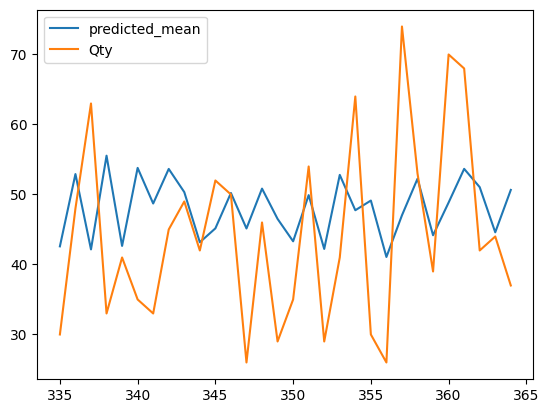

In [ ]:
pred.plot(legend=True)
test['Qty'].plot(legend=True)

## RETRAIN MODEL WITH ALL DATA

In [ ]:
model2 = ARIMA(df['Qty'], order=(40, 1, 1))
model2 = model2.fit()
df.tail()

,Date,Qty
360,2022-12-27,70
361,2022-12-28,51
362,2022-12-29,42
363,2022-12-30,44
364,2022-12-31,37


## TEST MODEL FOR FUTURE DATES

In [ ]:
# Predict daily
index_future_dates = pd.date_range(start='2023-01-01', end='2023-01-01')
pred_daily = model2.predict(start=len(df), end=len(df), typ='levels').rename('ARIMA Predictions')
pred_daily.index = index_future_dates

In [ ]:
# Predict monthly
index_future_dates = pd.date_range(start='2023-01-01', end='2023-01-31')
pred_monthly = model2.predict(start=len(df), end=len(df)+30, typ='levels').rename('ARIMA Predictions')
pred_monthly.index = index_future_dates

In [ ]:
# Round to int for daily prediction
pred_daily[0] = round(pred_daily[0])
print(pred_daily.index[0], " Qty: ", pred_daily.values[0])

2023-01-01 00:00:00  Qty:  43.0


In [ ]:
# Round to int for monthly prediction
i = 0
for x in pred:
  pred_monthly[i] = round(x)
  i += 1

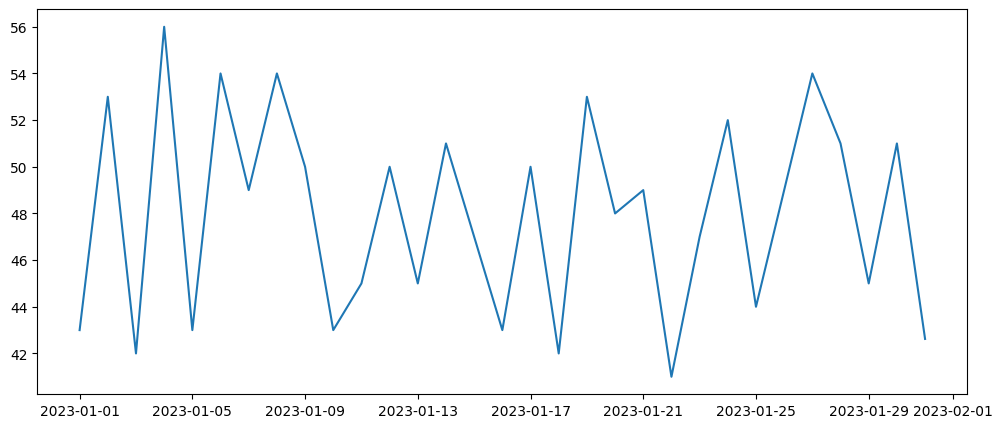

In [ ]:
pred_df = {'Date': pred_monthly.index, 'Qty': pred_monthly.values}
pred_df = pd.DataFrame(pred_df)

final_df = pd.concat([df, pred_df])
plt.figure(figsize=(12,5))
plt.plot(pred_df['Date'], pred_df['Qty'])